# Week 5 Final Kaggle Data Set from Patient Data

https://www.kaggle.com/datasets/thedevastator/virtual-patient-model-assessment

https://www.kaggle.com/datasets/meirnizri/covid19-dataset

https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

## Goal is to use K-Means Clustering to group and test data from several datasets found on Kaggle. A link to each one of these is listed above


In [1]:
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt            
from sklearn.svm import SVC                                
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pathlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler,normalize  
import warnings 
from sklearn.decomposition import PCA

## Run some basic data review of file data by using 'Info' to get an idea of the fields and  structure of the data. The non-null is important as too many null values in a column may render that column as not usable.

In [20]:
#file_name = "Covid_Data.csv"
#file_name = "Mall_Customer_Segmentation_Data.csv"
file_name = "Virtual Patient Models_Dataset.csv"

Cluster_Data = pd.read_csv(file_name)
print("Shape of Cluster Data: ",Cluster_Data.shape)
print(Cluster_Data.info())

Shape of Cluster Data:  (117, 59)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   part_id                          117 non-null    int64  
 1   clinical_visit                   117 non-null    int64  
 2   fried                            117 non-null    object 
 3   gender                           117 non-null    object 
 4   q_date                           117 non-null    object 
 5   age                              117 non-null    int64  
 6   comorbidities_most_important     116 non-null    object 
 7   hospitalization_one_year         117 non-null    int64  
 8   hospitalization_three_years      117 non-null    int64  
 9   ortho_hypotension                117 non-null    object 
 10  vision                           117 non-null    object 
 11  audition                         117 non-null    o

## Setup removing columns with too many null values.
## I set a threshold of 25% or more as criteria for removing a column.

In [21]:
print()
print("Checking of for null data: ")
print()
Cluster_Data_Final = Cluster_Data.copy()

Number_of_Rows = Cluster_Data_Final[Cluster_Data_Final.columns[0]].count()
Null_Data = Cluster_Data_Final.isnull().sum()
Check_Null_Data = pd.DataFrame({'Field_Name':Null_Data.index, 'Null_Count':Null_Data.values})
Check_Null_Data["Percent_Null"] = (Check_Null_Data["Null_Count"]/Number_of_Rows)*100

# set and remove data columns where the percentage of null sis higher than the 
# lower limit set
Percentage_Lower_Limit = 25.0
mask = (Check_Null_Data['Percent_Null']  >= Percentage_Lower_Limit)
Columns_to_remove = Check_Null_Data.loc[mask]["Field_Name"]
Columns_Removal_List = pd.DataFrame({'Field_Name':Columns_to_remove.values})
print('Fields being removed: ')
print()
for index, row in Columns_Removal_List.iterrows():
    print(row['Field_Name'])
    #drop column from Cluster Data    
    Cluster_Data_Final = Cluster_Data_Final.drop(row['Field_Name'], axis =1)
    
print()
print(Cluster_Data_Final.info())


Checking of for null data: 

Fields being removed: 

bmi_body_fat
lean_body_mass
mna_total
house_suitable_participant
house_suitable_professional
stairs_number

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   part_id                          117 non-null    int64  
 1   clinical_visit                   117 non-null    int64  
 2   fried                            117 non-null    object 
 3   gender                           117 non-null    object 
 4   q_date                           117 non-null    object 
 5   age                              117 non-null    int64  
 6   comorbidities_most_important     116 non-null    object 
 7   hospitalization_one_year         117 non-null    int64  
 8   hospitalization_three_years      117 non-null    int64  
 9   ortho_hypotension                117 non-null 

## Show more detail about the remaining columns. 

## Checking to see how unique each column is as to avoid including a field/column that almost acts an index column. 

## With this data there are several columns that fairly high unique counts (q_date,raise_chair_time, gait_get_up, bmi_score). 

## It is possible these fields might  need some grouping done but they also seem to be necessary for this dataset's collection process. 

## I would say q_date, part_id (participant id) and clinical visit (visit count for that clinical visit) should be removed for cluster analysis purposes




In [22]:
print('Number of Unique values in each column: ')
print()
print(Cluster_Data_Final.nunique())

Number of Unique values in each column: 

part_id                             30
clinical_visit                       4
fried                                3
gender                               2
q_date                             101
age                                 16
comorbidities_most_important         4
hospitalization_one_year             3
hospitalization_three_years          4
ortho_hypotension                    2
vision                               3
audition                             2
weight_loss                          2
exhaustion_score                     2
raise_chair_time                    82
balance_single                       3
gait_get_up                         90
gait_speed_4m                       77
gait_optional_binary                 2
gait_speed_slower                    2
grip_strength_abnormal               2
low_physical_activity                2
falls_one_year                       5
fractures_three_years                4
bmi_score             

## Remove those fields not needed :

### q_date, part_id (participant id) and clinical visit (visit count for that clinical visit)

In [24]:
Column_names = ('part_id','q_date','clinical_visit')
for Column in Column_names:
    print(Column)
    Cluster_Data_Final = Cluster_Data_Final.drop(Column, axis =1)
print()
print(Cluster_Data_Final.nunique())

part_id
q_date
clinical_visit

fried                                3
gender                               2
age                                 16
comorbidities_most_important         4
hospitalization_one_year             3
hospitalization_three_years          4
ortho_hypotension                    2
vision                               3
audition                             2
weight_loss                          2
exhaustion_score                     2
raise_chair_time                    82
balance_single                       3
gait_get_up                         90
gait_speed_4m                       77
gait_optional_binary                 2
gait_speed_slower                    2
grip_strength_abnormal               2
low_physical_activity                2
falls_one_year                       5
fractures_three_years                4
bmi_score                          104
waist                               37
screening_score                      4
cognitive_total_score            

## Make sure we are using just numbers by converting categorical values to integers

In [25]:
from sklearn.preprocessing import LabelEncoder as le

Non_numeric_Data_Fields = Cluster_Data_Final.select_dtypes(exclude=np.number).columns.tolist()
Cluster_Data_Final[Non_numeric_Data_Fields] = Cluster_Data_Final[Non_numeric_Data_Fields].apply(le().fit_transform)

print("Fields to be Label Encoded: ")
print()
print(Non_numeric_Data_Fields)
print()    
print(type(Cluster_Data_Final))
print(Cluster_Data_Final)

Fields to be Label Encoded: 

['fried', 'gender', 'comorbidities_most_important', 'ortho_hypotension', 'vision', 'audition', 'weight_loss', 'balance_single', 'gait_optional_binary', 'gait_speed_slower', 'grip_strength_abnormal', 'low_physical_activity', 'memory_complain', 'sleep', 'living_alone', 'leisure_club', 'health_rate', 'health_rate_comparison', 'activity_regular', 'smoking']

<class 'pandas.core.frame.DataFrame'>
     fried  gender  age  comorbidities_most_important  \
0        2       1   78                             1   
1        2       1   79                             1   
2        2       1   79                             1   
3        2       1   80                             1   
4        1       0   72                             1   
..     ...     ...  ...                           ...   
112      2       0   75                             1   
113      0       0   78                             4   
114      0       0   78                             1   
115  

## Normalize/scale the data so it all fits in the same range for processing and update any remaining null values with mean of that column
## K-means will not work with null values

In [26]:
#Standardize/normalize the data
scalar = StandardScaler()
scaled_Cluster_data = pd.DataFrame(scalar.fit_transform(Cluster_Data_Final), columns = Cluster_Data_Final.columns) 

#update null values to mean of that column
scaled_Cluster_data.fillna(scaled_Cluster_data.mean(), inplace=True)
print(scaled_Cluster_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   fried                            117 non-null    float64
 1   gender                           117 non-null    float64
 2   age                              117 non-null    float64
 3   comorbidities_most_important     117 non-null    float64
 4   hospitalization_one_year         117 non-null    float64
 5   hospitalization_three_years      117 non-null    float64
 6   ortho_hypotension                117 non-null    float64
 7   vision                           117 non-null    float64
 8   audition                         117 non-null    float64
 9   weight_loss                      117 non-null    float64
 10  exhaustion_score                 117 non-null    float64
 11  raise_chair_time                 117 non-null    float64
 12  balance_single        

## Check for outliers using a horizontal BoxPlot.
## Outliers can affect a K-means clustering. So. here we display all the remaining variables as horizontal boxplots to show where we might have problem data.
## After, review the data does show it to be littered with outliers on multiple columns. I would normally take steps to account for this, but the dataset is small already and removing those rows might impact the grouping.
## While we have multiple visits from the same individual, I did review the data using an Excel pivot to see how much the data varied from one visit to the next and it varies enough to warrant no removing those outliers like you see in 'gait_speed_4m'

<AxesSubplot: >

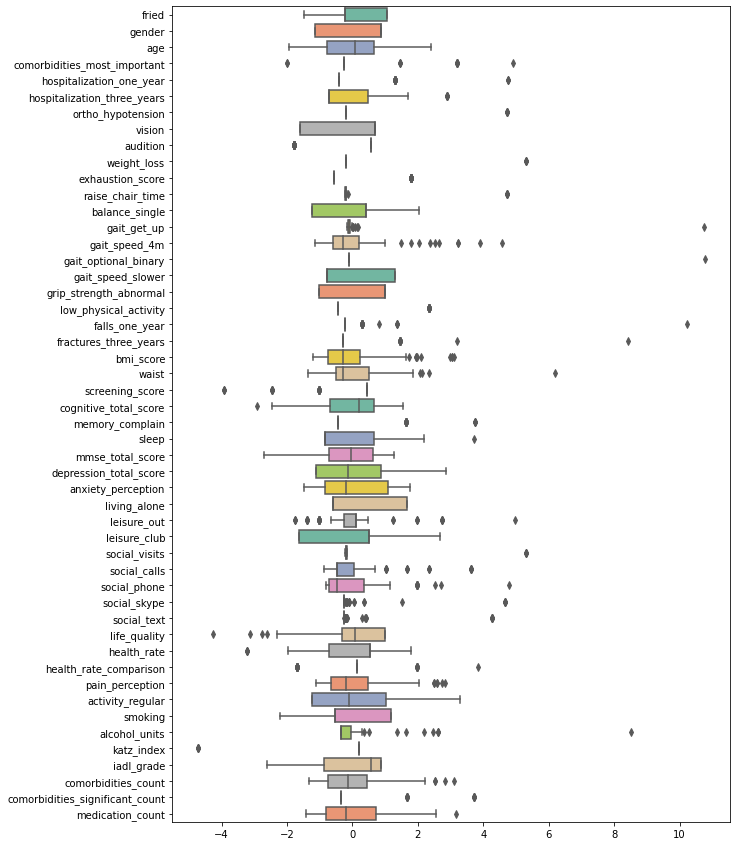

In [28]:
fig, ax = plt.subplots(figsize=(10, 15))
sns.boxplot(data=scaled_Cluster_data, orient="h", palette="Set2")

## There may be more fields/columns that should be removed due to them being a target value of the dataset. This this one had several that I questioned as they seemed like they could be target (y/outcome) variables. These were, 'fried' score, 'katz_index' and 'iadl_grade'. 
## The documention on the Kaggle website was thin though and did not indicate any specific target/outcome variable. Thus none were removed for this particular analysis.
## We want to remove any outcome variable so that the dataset being grouped is an unsupervised one and including that variable could cause issues with the data being analyzed

In [29]:
##Set y_labels before predictions and remove the target value from the dataset

#y_Cluster_Data = scaled_Cluster_data['CLASIFFICATION_FINAL']
#X_Cluster_Data = scaled_Cluster_data.drop('CLASIFFICATION_FINAL', axis =1)

#y_Cluster_Data = scaled_Cluster_data['katz_index']
#X_Cluster_Data = scaled_Cluster_data.drop('katz_index', axis =1)

#y_Cluster_Data = scaled_Cluster_data['CLASIFFICATION_FINAL']
#X_Cluster_Data = scaled_Cluster_data.drop('CustomerID', axis =1) # this is too unique




## Run Elbow method to help determine number of clusters needed.
## This Graph did not show an explicit elbow so further testing will be needed

<function matplotlib.pyplot.show(close=None, block=None)>

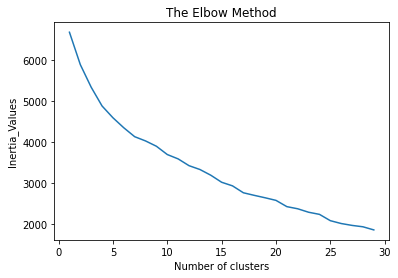

In [31]:
Inertia_Values = []

Number_of_Clusters_to_Test = 30
for i in range(1, Number_of_Clusters_to_Test):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_Cluster_Data)
    Inertia_Values.append(kmeans.inertia_)
    
plt.plot(range(1, Number_of_Clusters_to_Test), Inertia_Values)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia_Values')
plt.show

## Run test using different Cluster sizes and review inertia value for choosing a cluster number to use

In [34]:
warnings.simplefilter('ignore')
#Total_label_Count = y_Cluster_Data.size
Number_of_Clusters_to_Test = 31

## Data Frme to hold cluster results
Cluster_Tests = None
Cluster_Tests =  pd.DataFrame(columns = ['Cluster_Number', 'Inertia'], index = range(Number_of_Clusters_to_Test-1))
                                         
for i in range(1, Number_of_Clusters_to_Test):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_Cluster_Data)
    labels = kmeans.labels_
    cluster_Number = i
    Cluster_Tests.loc[i-1] = (cluster_Number, kmeans.inertia_)
                        

print(Cluster_Tests)
warnings.resetwarnings()

   Cluster_Number      Inertia
0               1       6674.0
1               2  5885.717554
2               3  5335.319027
3               4    4878.9169
4               5  4592.365801
5               6  4348.171171
6               7  4131.608751
7               8  4028.108411
8               9  3898.738694
9              10   3697.21873
10             11  3590.842321
11             12   3425.96974
12             13  3333.023202
13             14  3194.103035
14             15  3022.401756
15             16  2934.586782
16             17   2766.50057
17             18  2703.686478
18             19  2644.598395
19             20  2581.312452
20             21  2428.856429
21             22  2376.672631
22             23  2292.530638
23             24  2240.853954
24             25  2087.044052
25             26  2017.708072
26             27  1972.000635
27             28  1938.344897
28             29  1862.197434
29             30   1800.25508


## The inertia value does get better as the cluster count get's higher , but I would consider a lower cluster count due the relatively small databaset.
## These are not great inertia values for K-Means 
## I am going to go with 10 for a cluster count for graphing purposes, as more than that with a dataset as small as this will result in too few datapoints in each cluster

In [37]:
cluster_Number = 10
kmeans = KMeans(init='k-means++', n_clusters=cluster_Number, n_init=50, random_state=42)

kmeans.fit(X_Cluster_Data)
pred = kmeans.predict(X_Cluster_Data)
print(pred)

[4 2 2 4 4 4 4 4 2 2 2 2 5 5 5 5 6 6 6 6 3 3 3 3 2 2 2 2 4 4 4 4 2 2 2 2 4
 4 4 4 2 2 2 2 2 2 2 2 3 3 3 3 6 6 6 4 9 5 5 5 7 7 1 1 4 4 1 7 7 6 1 1 7 1
 1 1 7 1 1 1 8 8 1 1 7 7 1 1 7 8 6 7 1 1 1 8 1 1 1 7 7 1 1 1 1 1 0 0 0 7 1
 6 6 8 8 3 3]


## Review Results of clustering and add the predicted cluster values to the dataframe. Here we see the degration in number of points in each cluster

In [39]:
X_Cluster_Data['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )

print('Total in each cluster = \n', X_Cluster_Data['Cluster'].value_counts())


Total in each cluster = 
 1    27
2    22
4    17
7    13
6    11
3    10
5     7
8     6
0     3
9     1
Name: Cluster, dtype: int64


## Utilize PCA to reduce the number of dimensions so we can graph the grouped/clustered data

In [59]:
pca = PCA(n_components=2)
pca.fit(X_Cluster_Data)
data_pca = pca.transform(X_Cluster_Data)
#print(data_pca)

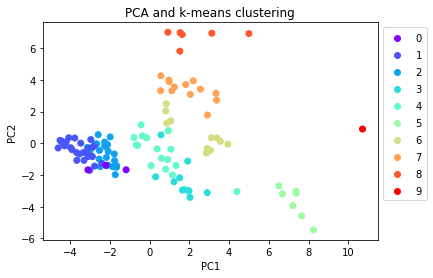

In [67]:
# Plot the clusters using a scatter plot
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=X_Cluster_Data["Cluster"], cmap="rainbow")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA and k-means clustering")
plt.legend(*scatter.legend_elements(),bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

plt.show()

## While this dataset was not perfect due to issues with outliers and multiple entries from the same individuals it did end grouping better than I expected.

## This Could be a great dataset but would need more data and some consolidation around each participant where each field is averaged for that paticipants visits to make it more usefull for a K-Means analysis

## I did try two other datasets from Kaggle, which are both shown with their links at the top of this Notebook

## One was a much larger data set using Covid data, but found it to be a problematic due to the number of fields that were basically binary(yes/no) data fields. This did not work well the K-Means as there was not enough variation data wise and that led to many data points not getting grouped at all. Very poor performance with this set.

## The other was a training dataset for Mall shoppers. This one suffered from very few fields that did not really give enough data to provide insights. This was only 200 rows of data and could probably have been relegated to an excel file for insights and analysis. I did see a couple K-Means projects on this data on Kaggle, but again no reall information gleaned using machine learning

